<a href="https://colab.research.google.com/github/Ash-wika/data-experiments/blob/main/Day1_Started_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interior Design Style Recommender – ML Mini Project**

This is a basic machine learning model that suggests an interior design style based on:
- Room Type
- Mood / Ambience
- Budget

Model used: Decision Tree Classifier  
Dataset: Custom (manually created)  
Libraries: pandas, scikit-learn

**Output:** Predicts styles like *Scandinavian*, *Boho Chic*, *Industrial*, etc., based on user inputs.

*Built by Ashwika as part of my learning journey in AI & Smart Design Systems.*



In [ ]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from IPython.display import display

# Step 2: Create Dataset (Text Form)
data = {
    'Room_Type': ['Bedroom', 'Bedroom', 'Living Room', 'Living Room', 'Office', 'Office'],
    'Mood': ['Cozy', 'Vibrant', 'Modern', 'Cozy', 'Minimal', 'Creative'],
    'Budget': ['Low', 'Medium', 'High', 'Low', 'High', 'Medium'],
    'Style': ['Scandinavian', 'Boho Chic', 'Contemporary', 'Scandinavian', 'Industrial', 'Eclectic']
}
df = pd.DataFrame(data)

# Step 3: Create Separate LabelEncoders
le_room = LabelEncoder()
le_mood = LabelEncoder()
le_budget = LabelEncoder()
le_style = LabelEncoder()

# Fit encoders on original data (before overwriting)
le_room.fit(df['Room_Type'])
le_mood.fit(df['Mood'])
le_budget.fit(df['Budget'])
le_style.fit(df['Style'])

# Now transform and overwrite columns
df['Room_Type'] = le_room.transform(df['Room_Type'])
df['Mood'] = le_mood.transform(df['Mood'])
df['Budget'] = le_budget.transform(df['Budget'])
df['Style'] = le_style.transform(df['Style'])

# Show encoded dataset
display(df)

# Step 4: Train-Test Split and Model Training
X = df[['Room_Type', 'Mood', 'Budget']]
y = df['Style']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 5: Check Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

# Step 6: Predict from New User Input
# Example input: Bedroom + Cozy + Low Budget
room_encoded = le_room.transform(['Bedroom'])[0]
mood_encoded = le_mood.transform(['Cozy'])[0]
budget_encoded = le_budget.transform(['Low'])[0]

user_input = pd.DataFrame([{
    'Room_Type': room_encoded,
    'Mood': mood_encoded,
    'Budget': budget_encoded
}])

predicted_style_encoded = model.predict(user_input)[0]
predicted_style = le_style.inverse_transform([predicted_style_encoded])[0]

print("Suggested Interior Style:", predicted_style)


,Room_Type,Mood,Budget,Style
0,0,0,1,4
1,0,4,2,0
2,1,3,0,1
3,1,0,1,4
4,2,2,0,3
5,2,1,2,2


Model Accuracy: 50.0 %
Suggested Interior Style: Scandinavian




---


# Mini Data Analysis Project – Sales Insights Using Pandas & Seaborn
### Date: 21 June 2025

This mini-project focuses on analyzing a fictional Diwali sales dataset using key data analysis techniques in **Pandas** and **Seaborn**. The aim is to extract insights from customer purchase patterns, grouped by gender, age group, and city.

### Key Objectives:
- Practice `groupby()`, `pivot_table()`, and `merge()` operations in Pandas
- Visualize data distributions and summaries using Seaborn and Matplotlib
- Strengthen data cleaning, grouping, and aggregation concepts

### Tools & Libraries:
- Python
- Pandas
- Seaborn
- Matplotlib

> This notebook is part of my structured daily skill-building routine for improving data analysis and visualization skills.


In [ ]:
import pandas as pd

In [ ]:
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male'],
    'Age Group': ['26-35', '18-25', '26-35', '36-45', '18-25', '46-50', '36-45'],
    'City': ['Delhi', 'Mumbai', 'Delhi', 'Bangalore', 'Mumbai', 'Delhi', 'Bangalore'],
    'Amount': [2500, 1200, 3300, 1500, 1800, 2200, 1700],
    'Quantity': [2, 1, 3, 1, 2, 2, 1]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Gender,Age Group,City,Amount,Quantity
0,Male,26-35,Delhi,2500,2
1,Female,18-25,Mumbai,1200,1
2,Female,26-35,Delhi,3300,3
3,Male,36-45,Bangalore,1500,1
4,Female,18-25,Mumbai,1800,2
5,Male,46-50,Delhi,2200,2
6,Male,36-45,Bangalore,1700,1


In [ ]:
df.groupby('Gender')['Amount'].sum()

,Amount
Gender,
Female,6300
Male,7900


In [ ]:
df.pivot_table(index='Gender', columns='City', values='Amount', aggfunc='sum')

City,Bangalore,Delhi,Mumbai
Gender,,,
Female,NaN,3300.0,3000.0
Male,3200.0,4700.0,NaN


In [ ]:
df.pivot_table(index='Age Group', values='Amount', aggfunc='mean')

,Amount
Age Group,
18-25,1500.0
26-35,2900.0
36-45,1600.0
46-50,2200.0


In [ ]:
import pandas as pd

# Customer data
customers = pd.DataFrame({
    'Customer_ID': [1, 2, 3],
    'Name': ['Aman', 'Bina', 'Chirag']
})

# Orders data
orders = pd.DataFrame({
    'Order_ID': [101, 102, 103],
    'Customer_ID': [2, 1, 3],
    'Amount': [2500, 1800, 3200]
})

# Merge on Customer_ID
merged_df = pd.merge(customers, orders, on='Customer_ID')
merged_df


,Customer_ID,Name,Order_ID,Amount
0,1,Aman,102,1800
1,2,Bina,101,2500
2,3,Chirag,103,3200


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

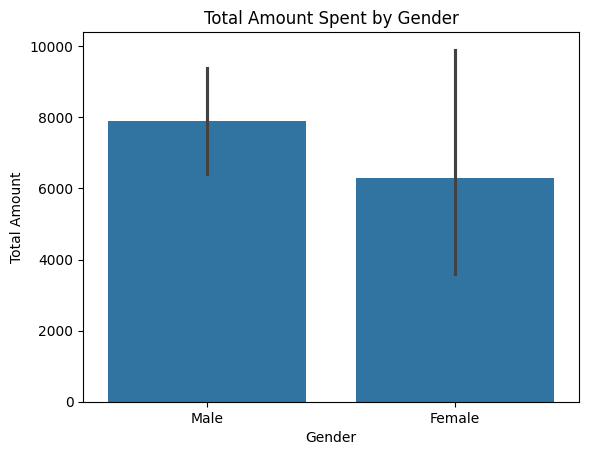

In [ ]:
sns.barplot(x='Gender', y='Amount', data=df, estimator=sum)
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

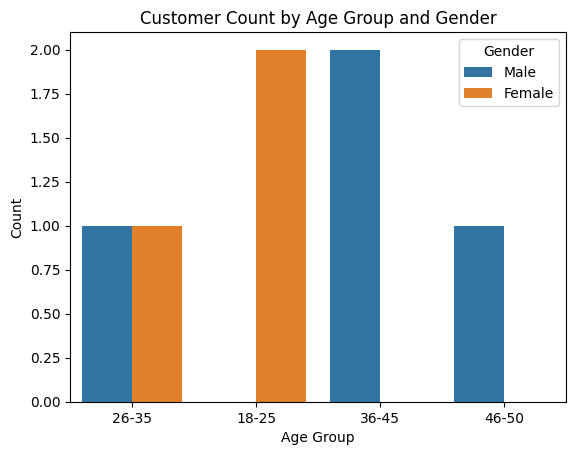

In [ ]:
# Plot: Count of customers by Age Group and Gender
sns.countplot(x='Age Group', hue='Gender', data=df)
plt.title('Customer Count by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


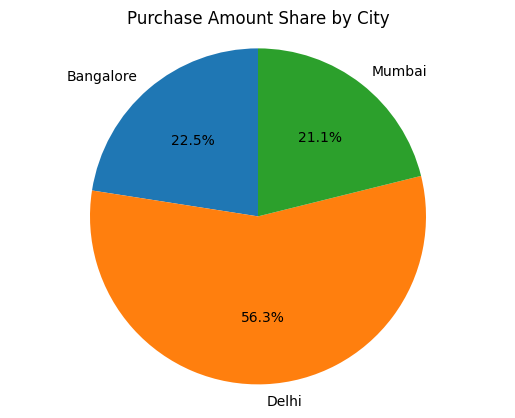

In [ ]:
# Grouping total amount by city
city_amt = df.groupby('City')['Amount'].sum()

# Pie Chart
plt.pie(city_amt, labels=city_amt.index, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Amount Share by City')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.show()